OpenAi XOR Problem

In [22]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import pad_sequences

In [23]:
def gen_len50(size=100000, length=50):
    X_data_1 = []
    Y_data_1 = []
    for i in range(size):
        data = np.random.randint(2, size=(1, length)).astype("float32")
        X_data_1.append(data)
        labels = [0 if np.sum(X_data_1[i])%2 == 0 else 1]
        Y_data_1.append(labels)
    return X_data_1, Y_data_1

In [24]:
X_data1, Y_data1 = gen_len50()

In [25]:
X_data1[0]

array([[0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
        1., 1.]], dtype=float32)

In [26]:
Y_data1[0]

[0]

In [27]:
split_size = int(100000*0.20)

In [28]:
split_size

20000

In [29]:
X_train = X_data1[split_size:]
X_test = X_data1[:split_size]

Y_train = Y_data1[split_size:]
Y_test = Y_data1[:split_size]

In [30]:
print(len(X_train))

80000


In [31]:
model = Sequential([
    LSTM(32, return_sequences=True, activation='sigmoid', input_shape=(1, 50)),
    LSTM(64, return_sequences=True, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 32)             10624     
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)             24832     
                                                                 
 dense_1 (Dense)             (None, 1, 1)              65        
                                                                 
Total params: 35,521
Trainable params: 35,521
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile('adam', loss='binary_crossentropy', metrics=['acc'])

In [34]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [35]:
norm = np.linalg.norm(X_train)
normal_array = X_train/norm
print(normal_array)

[[[0.         0.         0.00070719 ... 0.00070719 0.         0.        ]]

 [[0.         0.00070719 0.         ... 0.00070719 0.00070719 0.        ]]

 [[0.         0.         0.         ... 0.00070719 0.00070719 0.        ]]

 ...

 [[0.00070719 0.00070719 0.         ... 0.00070719 0.00070719 0.        ]]

 [[0.         0.00070719 0.         ... 0.00070719 0.00070719 0.00070719]]

 [[0.         0.00070719 0.         ... 0.00070719 0.         0.        ]]]


In [36]:
norm = np.linalg.norm(Y_train)
normal_array = Y_train/norm
print(normal_array)

[[0.        ]
 [0.00500701]
 [0.00500701]
 ...
 [0.00500701]
 [0.00500701]
 [0.00500701]]


In [37]:
norm = np.linalg.norm(X_test)
normal_array = X_test/norm
print(normal_array)

[[[0.         0.00141354 0.         ... 0.00141354 0.00141354 0.00141354]]

 [[0.00141354 0.00141354 0.         ... 0.         0.00141354 0.00141354]]

 [[0.         0.         0.         ... 0.00141354 0.         0.00141354]]

 ...

 [[0.00141354 0.         0.00141354 ... 0.00141354 0.         0.00141354]]

 [[0.00141354 0.         0.00141354 ... 0.         0.         0.        ]]

 [[0.         0.         0.00141354 ... 0.         0.00141354 0.        ]]]


In [38]:
norm = np.linalg.norm(Y_test)
normal_array = Y_test/norm
print(normal_array)

[[0.        ]
 [0.        ]
 [0.01006156]
 ...
 [0.        ]
 [0.01006156]
 [0.        ]]


In [39]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
2500/2500 [==============================] - 12s 4ms/step - loss: 0.6936 - acc: 0.5008
Epoch 2/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6935 - acc: 0.5011
Epoch 3/50
2500/2500 [==============================] - 11s 5ms/step - loss: 0.6938 - acc: 0.4983
Epoch 4/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6935 - acc: 0.5037
Epoch 5/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6935 - acc: 0.5001
Epoch 6/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6932 - acc: 0.5062
Epoch 7/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.6933 - acc: 0.5033
Epoch 8/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6932 - acc: 0.5064
Epoch 9/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6931 - acc: 0.5072
Epoch 10/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6930 - acc: 0.5084
Epoch 11/50
2500/250

In [ ]:
# Evaluate model on test set
preds = model.predict(X_test)
preds = np.round(preds[:, 0]).astype('float32')
acc = (np.sum(preds == Y_test) / len(Y_test)) * 100.
print('Accuracy: {:.2f}%'.format(acc))

Accuracy: 50.08%


In [42]:
def plot_model(history):
    ''' Plot model accuracy and loss
    Args:
        history: Keras dictionary contatining training/validation loss/acc
    Returns:
        Plots model's training/validation loss and accuracy history
    '''
    loss = history.history['loss']

    epochs = range(1, len(loss) + 1)

    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.title('Training  loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    acc = history.history['acc']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    return

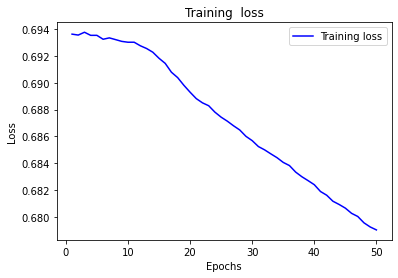

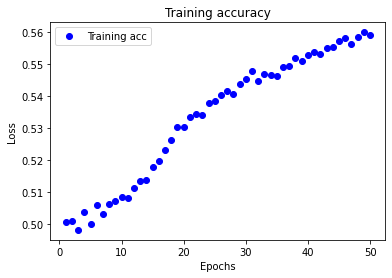

In [43]:
plot_model(history)